In [24]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  8 21:43:54 2021

@author: fairu
"""

#Importing all the required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

np.random.seed(0)

#Downloading the dataset, creating dataframe
df = pd.read_csv (r'C:\Users\fairu\Desktop\dataset\final sets\final_dataset_all_SVM.csv')

#Separating data & target information
y= df.iloc [:,16]
X = df.iloc[:,0:16]

# Split samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) # training split = 70%, test split = 30%

#Split train set with train and validation (val size is 145 samples from 845 training samples)

X_train_only, X_val, y_train_only, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0, stratify=y_train)

# standardization
sc = StandardScaler()

# Scale training data
sc.fit(X_train_only)
X_train_only_std = sc.transform(X_train_only)

sc.fit(X_val)
X_val_std = sc.transform(X_val)

sc.fit(X_test)
X_test_std = sc.transform(X_test)

# training the model
svm = SVC(kernel='rbf', C=1, gamma=0.1, max_iter = 300, random_state=0)  #kernel='rbf', C=1, gamma=0.1

# This is training the model
svm.fit(X_train_only_std, y_train_only)

#prediction on validation set
y_pred_val = svm.predict(X_val_std)

print('Training Accuracy: %.2f' % svm.score(X_train_only_std, y_train_only))
print('Validation Accuracy: %.2f' % svm.score(X_val_std, y_val))
print('Misclassified validation samples: %d' % (y_val != y_pred_val).sum())

#Testing with the test data
y_pred_test = svm.predict(X_test_std)
print('Misclassified test samples: %d' % (y_test != y_pred_test).sum())
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_test))


C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training Accuracy: 0.98
Validation Accuracy: 0.97
Misclassified validation samples: 35
Misclassified test samples: 144
Test Accuracy: 0.97


In [40]:
#Test on real data
X_mean = np.mean(X)
X_dev = np.std(X)
#Downloading the dataset, creating dataframe
df_test = pd.read_csv (r'C:/Users/fairu/Desktop/dataset/real data/test_dataset_scream.csv')

In [41]:
#Separating data & target information
y_test_real= df_test.iloc [:,16]
X_test_real = df_test.iloc[:,0:16]

In [42]:
#standardization
X_test_std_real = (X_test_real-X_mean)/X_dev

In [43]:
X_test_std_real

,mean_mfcc1,mean_mfcc2,mean_mfcc3,mean_mfcc4,mean_mfcc5,mean_mfcc6,mean_mfcc7,mean_mfcc8,mean_mfcc9,mean_mfcc10,mean_mfcc11,mean_mfcc12,mean_mfcc13,mean_zcr,mean_centroid,mean_RMSE
0,0.225456,0.875906,0.031523,1.363481,-0.397198,1.375429,0.110008,0.267132,0.598258,0.009180,0.468187,-0.142005,0.483500,-1.004326,-0.901367,-0.454087
1,0.333094,0.502559,0.017580,2.091051,-1.881083,1.875085,1.159299,-1.463008,2.823619,-0.714713,-0.643927,2.483704,-1.207002,0.328652,0.110741,0.243518
2,0.410851,-0.096018,0.361808,0.729831,-0.128793,1.139318,0.104880,0.830588,0.454980,0.052153,0.490779,0.153628,0.859349,0.063108,-0.004332,-0.436319
3,0.541863,1.298317,-0.726123,0.384554,-0.169356,0.730911,0.584743,0.292201,0.714323,-0.161696,-0.164778,0.462338,1.107281,-1.136309,-1.106046,-0.196545
4,0.504451,1.143672,-0.725314,0.711849,-1.040434,0.875891,-0.467981,0.287917,0.452249,0.235896,0.814985,0.605849,0.681662,-1.008533,-0.931882,-0.340005
5,0.772485,0.172537,0.156438,1.135752,-1.533302,1.286868,-0.047853,-0.062517,1.091220,0.676337,-0.599864,1.031021,0.633427,0.319713,0.023987,0.251379
6,0.366600,0.962534,0.026544,1.566172,-0.297201,0.495339,-1.077229,-0.773423,-0.588679,-0.589434,0.273633,0.602559,0.335509,-0.833957,-1.033756,0.222496
7,1.723559,-1.008659,-0.436418,-0.161400,0.173345,0.719399,0.635382,1.225807,0.206542,-0.653632,0.842467,1.855659,0.839402,-0.010990,0.588856,6.856392
8,0.851427,-1.118397,-0.020594,0.871472,-0.519137,1.016397,-0.271522,0.809134,0.052812,0.242100,0.925050,0.226473,0.198552,0.767193,0.919788,0.001260
9,0.011443,1.122045,0.208751,1.549357,-0.175618,0.604903,0.262496,-0.216092,-0.062526,-0.463911,0.602075,0.589408,0.400744,-1.393440,-1.262288,-0.394060


In [44]:
#Testing with the test data
y_pred_test_real = svm.predict(X_test_std_real)
print('Misclassified test samples: %d' % (y_test_real != y_pred_test_real).sum())
print('Test Accuracy: %.2f' % accuracy_score(y_test_real, y_pred_test_real))

Misclassified test samples: 16
Test Accuracy: 0.45


In [47]:
from sklearn.metrics import classification_report
target_names = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
print(classification_report(y_test_real, y_pred_test_real, target_names=target_names))

                precision    recall  f1-score   support

        scream       0.00      0.00      0.00         8
glass breaking       0.33      0.20      0.25         5
    background       0.44      0.80      0.57         5
        alarms       0.33      0.80      0.47         5
  conversation       0.80      0.67      0.73         6

      accuracy                           0.45        29
     macro avg       0.38      0.49      0.40        29
  weighted avg       0.36      0.45      0.37        29



C:\Users\fairu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#Cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

class_names = np.unique(y_test)
target_names = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
confmat = confusion_matrix(y_true=y_test_real, y_pred=y_pred_test_real, labels=class_names)
print(confmat)

[[0 0 0 8 0]
 [0 1 4 0 0]
 [0 0 4 0 1]
 [0 0 1 4 0]
 [0 2 0 0 4]]


<AxesSubplot:>

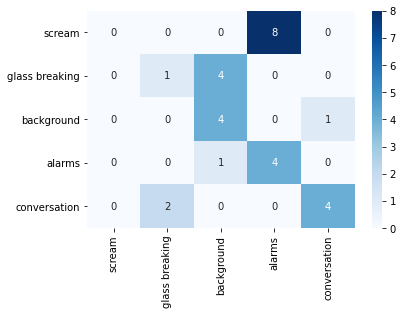

In [49]:
import seaborn as sns
categories = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
sns.heatmap(confmat, annot=True, fmt="d",cmap='Blues', xticklabels= categories, yticklabels=categories)


In [15]:
#t-SNE for real data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.manifold import TSNE


#Downloading the dataset, creating dataframe
df = pd.read_csv (r'C:/Users/fairu/Desktop/dataset/real data/test_dataset_scream.csv')

# train, test = train_test_split(df, test_size=0.3)
label = df["label"]
X = df.iloc[:,0:16]
train = StandardScaler().fit_transform(X)

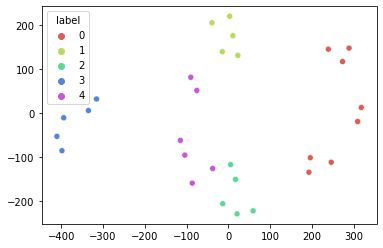

In [20]:
tsne = TSNE(n_components = 2, perplexity = 5.0, random_state=0)
tsne_res = tsne.fit_transform(train)

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(5), legend = 'full');